<a href="https://colab.research.google.com/github/cwwade04/CIS-3902-Data-Mining/blob/main/wade_Chapter_1_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA 8<br>
1.3 Plotting the Classics<br><br><a href="https://matthew-brett.github.io/cfd2020/intro/Plotting_the_Classics.html">Reference</a>

INSTRUCTIONS:  From Github, add "tocolab" after github and before the first period in the URL, or click on the COLAB link (blue) to open the file in COLAB.  Read and follow instructions in the Program once in Colab.  Complete the Homework Assignment at the end, then select File . . Download .ipynb. Save the file with yourlastname-Chapter-1-HW.ipynb and submit this file in the Chapter 1 Aassignment in Blackboard.

In this example, we will explore statistics for two classic novels: The Adventures of Huckleberry Finn by Mark Twain, and Little Women by Louisa May Alcott. The text of any book can be read by a computer at great speed. Books published before 1923 are currently in the public domain, meaning that everyone has the right to copy or use the text in any way. Project Gutenberg is a website that publishes public domain books online. Using Python, we can load the text of these books directly from the web.<br><br>

First we need to set up our environment and import a few packages and related modules:<br>
a.  The Data 8 text uses a package called "Data Science" that provides useful functions.<br>
b. Pandas for tabular data manipulation and analysis<br>
c. NumPy for working with arrays<br>
d. matplotlib for plotting<br>
e. warnings to provide warning control<br>
f. urllib (urlopen) to fetch urls<br>
g. re for regular expression operations<br><br>

STEP 1: Place your cursor (click) in the code cells and click on the triangle to the left of the code to execute (click Run Anyway on first code block if you get an authorization error).  Some code blocks will not display any output.  Some code blocks generate many messages!  You can clear these by clicking on the x where the messages are displayed.


In [1]:
#STEP 1:  we need to install datascience first because it is not a typical package that comes with our programming environment
#more information can be found here (optional reading https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)
#!pip install datascience
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install datascience
#
#after this is executed you can click on the x (person changes to x when cursor is hovered) in order to clear messages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00


In [2]:
#STEP 1:  continued
from datascience import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen
import re
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

STEP 2:  Running the code below will allow us to access https://www.inferentialthinking.com to read two books fast!  We are inputting Huck Finn and Little Women.  Remember to read the comments included with the code!  They start with "#".

In [3]:
# STEP 2:  Read two books, fast!
# No output yet, this stores the text in the string variables
# huck_finn_text, huck_finn_chapters, little_women_text and little_women_chapters

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [4]:
# STEP 2:  print the text in the variable huck_finn_chapters
huck_finn_chapters

['I. YOU don\'t know about me without you have read a book by the name of The Adventures of Tom Sawyer; but that ain\'t no matter. That book was made by Mr. Mark Twain, and he told the truth, mainly. There was things which he stretched, but mainly he told the truth. That is nothing. I never seen anybody but lied one time or another, without it was Aunt Polly, or the widow, or maybe Mary. Aunt Polly--Tom\'s Aunt Polly, she is--and Mary, and the Widow Douglas is all told about in that book, which is mostly a true book, with some stretchers, as I said before. Now the way that the book winds up is this: Tom and me found the money that the robbers hid in the cave, and it made us rich. We got six thousand dollars apiece--all gold. It was an awful sight of money when it was piled up. Well, Judge Thatcher he took it and put it out at interest, and it fetched us a dollar a day apiece all the year round--more than a body could tell what to do with. The Widow Douglas she took me for her son, and 

In [5]:
# STEP 2:  Create a table to display huck_finn_chapters in a more desirable format
Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


STEP 3:  Time to explore!  Think about what we have already done with a few lines of code!  Run the code blocks below (read the comments) and learn more about the text in Huck Finn!

In [6]:
# STEP 3:  this creates an array of counts for the number of times the name "Tom" appears in each of the chapters.
np.char.count(huck_finn_chapters, 'Tom')

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  4, 19, 15,
       14, 18,  9, 32, 11, 11,  8, 30,  6])

In [7]:
# STEP 3:  this creates an array of counts for the number of times the name "Jim" appears in each of the chapters.
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  5, 17,
       18, 23,  4, 27, 10, 13,  0, 12,  6])

In [8]:
# STEP 3:  Let's display this information in a more user friendly manner.
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])
counts

Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


STEP 4:  We can do better than a simple table.  How about a plot that shows how the counts or name mentions accumulate over the course of the book?
Click and run the code blocks associated with STEP 4 and marvel at how incredibly cool Python is!

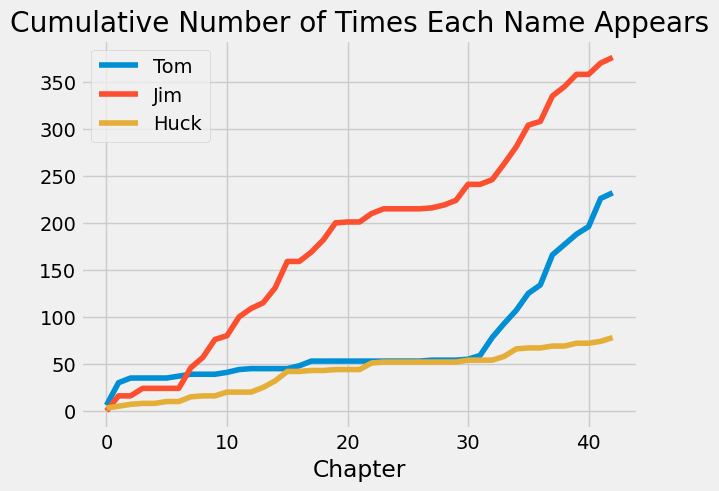

In [9]:
# STEP 4:  Remember, we have already counted how many times the names Jim,
# Tom, and Huck appear in each chapter.
# This information is stored in the "counts".

# In the code, we will plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

# Count how many times the characters appear in each chapter.
counts = pd.DataFrame.from_dict({
        'Tom': np.char.count(huck_finn_chapters, 'Tom'),
        'Jim': np.char.count(huck_finn_chapters, 'Jim'),
        'Huck': np.char.count(huck_finn_chapters, 'Huck')},
    )

# The cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.
cum_counts = counts.cumsum()

# Add the chapter numbers
number_of_chapters = len(huck_finn_chapters)
cum_counts['Chapter'] = np.arange(number_of_chapters)

# Do the plot
cum_counts.plot(x='Chapter')
plots.title('Cumulative Number of Times Each Name Appears');

STEP 5:  You know what is next!  We have Little Women ready to go - we have already read the text and we will run similar code on this classic. In order to condense the instructions, we are labeling all of the code for Little Women as "STEP 5".

In [10]:
# STEP 5: The chapters of Little Women

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


In [11]:
# STEP 5: Counts of names in the chapters of Little Women

people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}

counts = Table().with_columns([
        'Amy', people_counts['Amy'],
        'Beth', people_counts['Beth'],
        'Jo', people_counts['Jo'],
        'Laurie', people_counts['Laurie'],
        'Meg', people_counts['Meg']
    ])
counts

Amy,Beth,Jo,Laurie,Meg
23,26,44,0,26
13,12,21,0,20
2,2,62,16,36
14,18,34,0,17
6,14,55,35,13
6,28,13,9,5
27,5,9,7,5
48,9,71,17,16
3,5,21,24,71
5,5,12,4,4


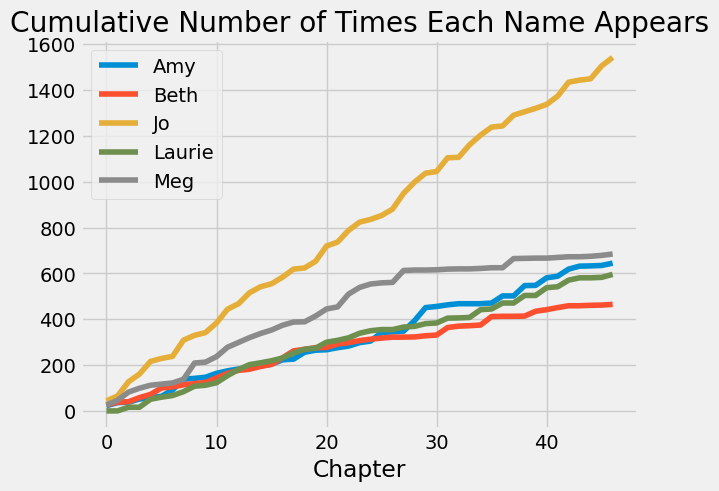

In [12]:
# STEP 5: Plot the cumulative counts

# The cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.
# Count how many times the characters appear in each chapter.
counts = pd.DataFrame.from_dict({
        'Amy': np.char.count(little_women_chapters, 'Amy'),
        'Beth': np.char.count(little_women_chapters, 'Beth'),
        'Jo': np.char.count(little_women_chapters, 'Jo'),
        'Laurie': np.char.count(little_women_chapters, 'Laurie'),
        'Meg': np.char.count(little_women_chapters, 'Meg')},
    )

# The cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.
cum_counts = counts.cumsum()

# Add the chapter numbers
number_of_chapters = len(little_women_chapters)
cum_counts['Chapter'] = np.arange(number_of_chapters)

# Do the plot
cum_counts.plot(x='Chapter')
plots.title('Cumulative Number of Times Each Name Appears');

STEP 6:  Now we are going to count the number of characters in each chapter of the books that we are analyzing in order to gain insight into the "length" of the chapters.  Our last plot will show the number of periods in each chapter and we compare Huck Finn and Little Women.  Periods equal sentences . . .

In [13]:
# STEP 6:  In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_hf = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_lw = Table().with_columns([
        'LW Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [15]:
# STEP 6:  The counts for Huckleberry Finn

chars_periods_hf

HF Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [14]:
# STEP 6:  The counts for Little Women

chars_periods_lw

LW Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


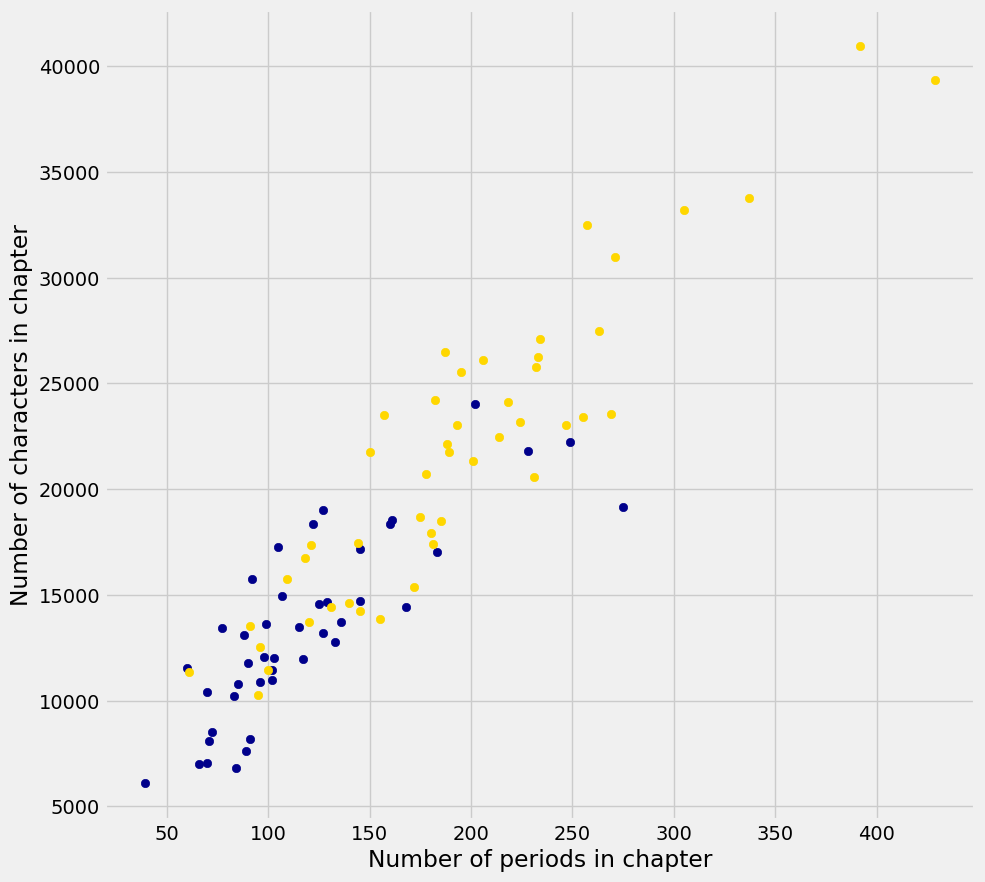

In [16]:
# STEP 6:  Final plot - let's compare the number of periods in Huck Finn and Little Women
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
plots.scatter(chars_periods_lw[1], chars_periods_lw[0], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

<h1>Homework:  Enter code for the steps below, select File . . . Download .ipynb (downloads to your local drive) and name your file yourlastname-Chapter-1-HW.ipynb, post your file on your Github site, link it in  markdown, and turn in your Github URL.

In [17]:
# HW STEP 1:  Input the Text (Insectivorous Plants by Charles Darwin)
# No output yet, this stores the text in the string variables
# use darwin in place of the other book names
# the URL is http://www.gutenberg.org/cache/epub/5765/pg5765.txt
# specify the Chapter argument as 'CHAPTER '
# be sure to include the space after the word Chapter
darwin_url = 'http://www.gutenberg.org/cache/epub/5765/pg5765.txt'
darwin_text = read_url(darwin_url)
darwin_chapters = darwin_text.split('CHAPTER ')[19:]


In [18]:
# HW STEP 2: add the code to print the text in the variable darwin_chapters (use the example above)
for i in range(3):
    print('CHAPTER', i+1)
    print(darwin_chapters[i][:1000])  # first 1000 characters
    print('-----')

CHAPTER 1
I. DROSERA ROTUNDIFOLIA, OR THE COMMON SUN-DEW. Number of insects captured—Description of the leaves and their appendages or tentacles— Preliminary sketch of the action of the various parts, and of the manner in which insects are captured—Duration of the inflection of the tentacles—Nature of the secretion—Manner in which insects are carried to the centre of the leaf—Evidence that the glands have the power of absorption—Small size of the roots. 
-----
CHAPTER 2
II. THE MOVEMENTS OF THE TENTACLES FROM THE CONTACT OF SOLID BODIES. Inflection of the exterior tentacles owing to the glands of the disc being excited by repeated touches, or by objects left in contact with them—Difference in the action of bodies yielding and not yielding soluble nitrogenous matter—Inflection of the exterior tentacles directly caused by objects left in contact with their glands—Periods of commencing inflection and of subsequent re-expansion—Extreme minuteness of the particles causing inflection—Action 

In [19]:
# HW STEP 3: add the code to create a table to display darwin_chapters in a more desirable format
# HW STEP 3: Put chapter numbers and text into a table
chapter_table = Table().with_columns(
    'Chapter', np.arange(1, len(darwin_chapters)+1),
    'Text', darwin_chapters
)
chapter_table.show(5)


Chapter,Text
1,"I. DROSERA ROTUNDIFOLIA, OR THE COMMON SUN-DEW. Number o ..."
2,II. THE MOVEMENTS OF THE TENTACLES FROM THE CONTACT OF S ...
3,III. AGGREGATION OF THE PROTOPLASM WITHIN THE CELLS OF T ...
4,IV. THE EFFECTS OF HEAT ON THE LEAVES. Nature of the exp ...
5,V. THE EFFECTS OF NON-NITROGENOUS AND NITROGENOUS ORGANI ...


In [25]:
# HW STEP 4: Run the code to make counts of terms in the chapters of Insectivorous Plants
# Start with using the terms insect, leaf, flower, plant, and rabbit

# note the number of lines +1
# (19) lines which will be used when charting the cumulative counts
terms = ['insect', 'leaf', 'flower', 'plant', 'spider']
term_counts = {this_term: np.char.count(darwin_chapters, this_term) for this_term in terms}
counts = Table().with_columns([
'insect', term_counts['insect'],
'leaf', term_counts['leaf'],
'flower', term_counts['flower'],
'plant', term_counts['plant'],
'spider', term_counts['spider']
])

counts


insect,leaf,flower,plant,spider
3,1,0,0,0
0,0,0,0,0
0,0,0,1,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,1,0,0,0


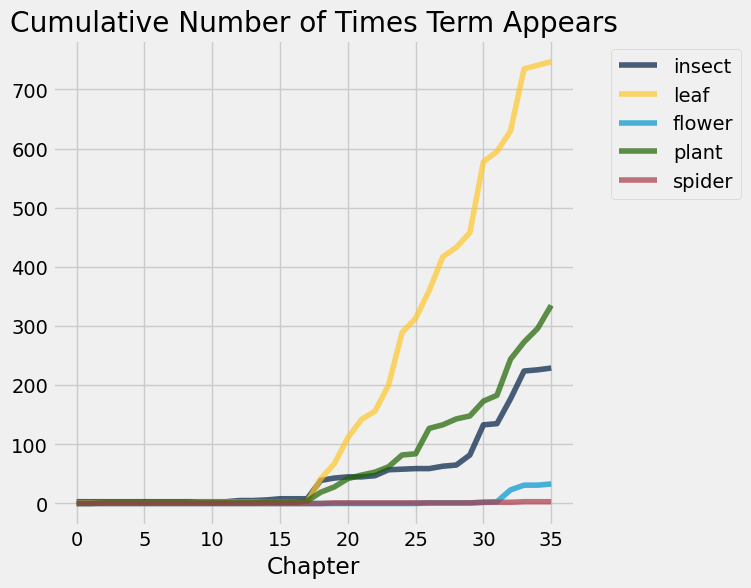

In [26]:
# HW STEP 5: Run code to plot the cumulative counts (you may need to
# use 36 for the number of chapters)
cum_counts = Table().with_column('Chapter', np.arange(0, 36, 1))

# Add cumulative word counts for each term
for term in terms:
    cum_counts = cum_counts.with_column(term, np.cumsum(counts.column(term)))

# Plot results
cum_counts.plot('Chapter')
plots.title('Cumulative Number of Times Term Appears');
# Now, go back to steps 4 and 5 and replace the term rabbit with another word such as spider and run the code again.
